In [1]:
#here are some useful imports for this particular series of examples 
from scipy.optimize import linprog
from IPython.core.display import Image, display
! pip install pulp
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy

Defaulting to user installation because normal site-packages is not writeable


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-v8l5pc0f because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


**The purpose of this first section of this project is to introduce the concept of Linear Programming.** 

*Linear programming*, a form of *mathematical programming*, is also called *linear optimization*. 

Linear programming is a mathematical method that is used to determine the best possible outcome or solution from a given set of parameters or list of requirements, which are represented in the form of linear relationships. It is most often used in computer modeling or simulation in order to find the best solution in allocating finite resources such as money, energy, manpower, machine resources, time, space and many other variables. In most cases, the "best outcome" needed from linear programming is maximum profit or lowest cost. This definition was shamelessly pilfered from Techopedia with snippets from Brittanica online. 

*The basic components of linear programming are as follows:*

- Decision variables: These are the quantities to be determined.

- Objective function: This represents how each decision variable would affect the cost, or, simply, the value that needs to be optimized.

- Constraints: These represent how each decision variable would use limited amounts of resources.

- Data: These quantify the relationships between the objective function and the constraints.

**Generalize Form of a Linear Program:**
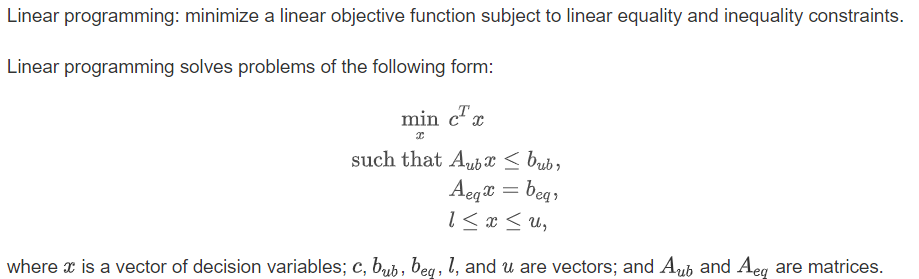

**The example problem for this first section is as follows:**

**Maximize          z  = x + 2y**

**Subject to the following constraints**<br>
2x + y <= 20<br>
-4x + 5y <= 10 <br>
-x + 2y >= -2 <br>
-x + 5y  = 15<br>
x >= 0 <br>
y >= 0<br>
                  
For this example, the variables x and y are our *decision variables*, x+2y is our *objective function*, and the *constraints* are the inequalities in the constraints section. Note the similarities between this example and the generalized form of a linear program shown above.

**Formulation** 
Often times, formulating the mathematical model is the most challenging part of an optimization problem. This is routinely the case in linear programming. For the sake of this problem, the formulation is given to us in an effort to demonstrate basic Linear Programming applications and progress towards more appropriate applications of math programming for this project. 

In [2]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],[-4,  5],[ 1, -2]]  # Red constraint left side , Blue constraint left side, Yellow constraint left side

rhs_ineq = [20, 10, 2]  # Red constraint right side # Blue constraint right side # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side
bnd = [(0, float("inf")),  # Bounds of x
        (0, float("inf"))]  # Bounds of y
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,method="simplex")
print('Here is the complete output for this LP using linprog from scipy.optimize:')
print(opt)
print('The optimal solution for this particular LP is', round(opt.x[0],3),'for x, and', round(opt.x[1],3),'for y. This is shown in the full output for opt above.')

Here is the complete output for this LP using linprog from scipy.optimize:
     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])
The optimal solution for this particular LP is 7.727 for x, and 4.545 for y. This is shown in the full output for opt above.


One of the interesting properties of a linear program is that the optimal solution will lie at the intersection of two or more constraints in the convex hull that represents the solution space. This feasibility region, bounded by the constraints from our formulation, is depicted in the graph below in between the red, blue, green, and yellow constraint "lines".

In an optimization problem with more than 2 decision variables, graphically the solution space is less simplistic and more difficult to visualize; that being said, the linear nature of the constraints define this feasibility region given that the constraints can be feasibly *jointly satisfied* and that the problem is not *unbounded*. In multi-dimensional space, this implies the feasibility region is the convex hull of a polyhedron. 

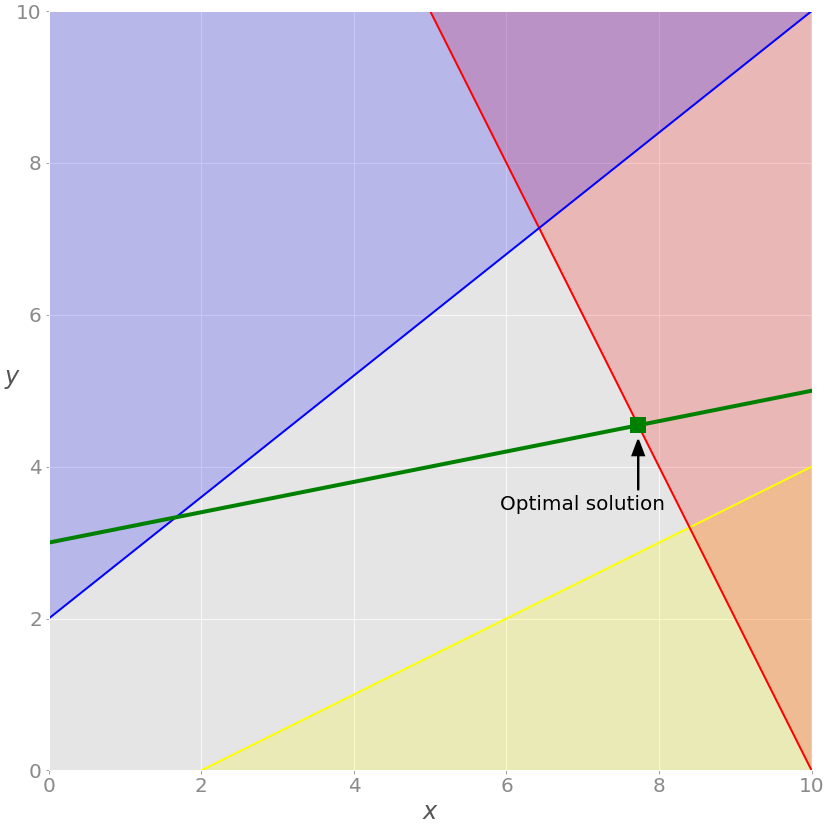

In [3]:
display(Image(filename='lp-py-fig-5.png'))

In [4]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="simplex")
print('The updated LP solved with a relaxed "green" constraint is displayed in figure 4 below:')
opt

The updated LP solved with a relaxed "green" constraint is displayed in figure 4 below:


     con: array([], dtype=float64)
     fun: -20.714285714285715
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.        , 0.        , 9.85714286])
  status: 0
 success: True
       x: array([6.42857143, 7.14285714])

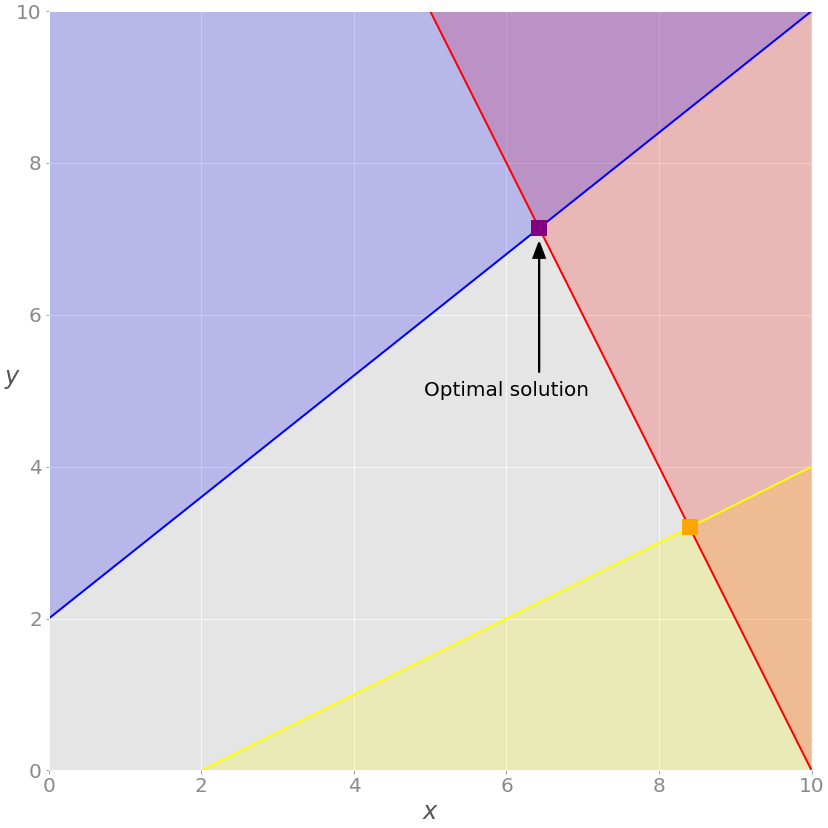

In [5]:
display(Image(filename='lp-py-fig-4.png'))

Note that the optimal solution moved along the edge of the convex hull of the polygon created in 2D space by the constraints in the formulation from the first section of this project. 

In this example, the optimal solution move along the edge of the convex hull in the direction of the gradient of the objective function. For maximization problems that will be towards the direction in which the objective function increases or vice versa for minimization problems. Here is a nice place to stop and mention the concept of a shadow price. Calculated as the ratio of the change in the objective function per one additional unit of constrained resource, the shadow price is essentially a *Lagrange multiplier* for linear optimization. Also called *marginal utility* in economics, here is a formula for finding shadow prices: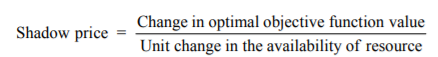

Shadow prices become increasingly useful in applied examples. You can think of this concept's application to a manufacturing problem when we present it in the next section of this project.

This analysis and solver (linprog using simplex method) utilzied a technique called the simplex method. Using simplex is a fancy way of saying that we are checking to see which *extreme points* at the intersection of constraints are the best solution to our objective function. Another method to solve these types of LPs is called the dual simplex method. Taking advantage of the concept of duality of our formulation, we can turn an optimization maximum problem into a minimization problem. Shamelessly stolen from *Sharma's Operations Research: Theory and Applications*, here is a table that is useful in explaining the subtlety amongst the primal and dual formulations of a linear program: 
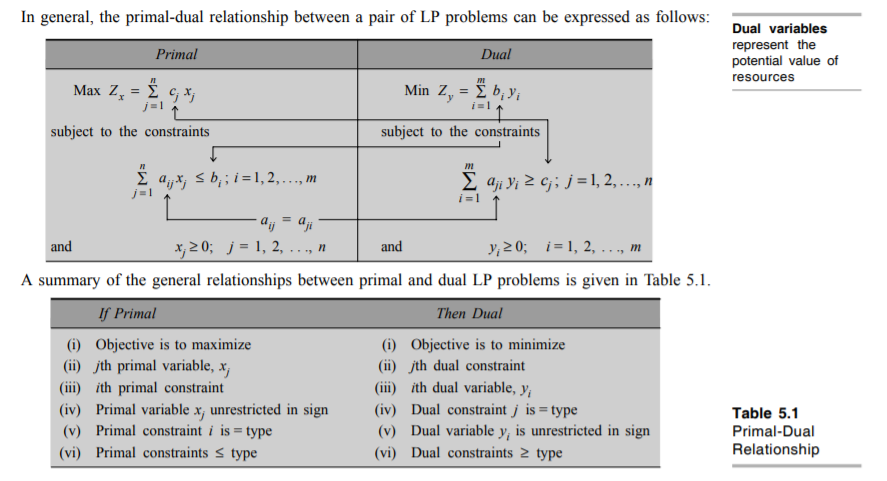

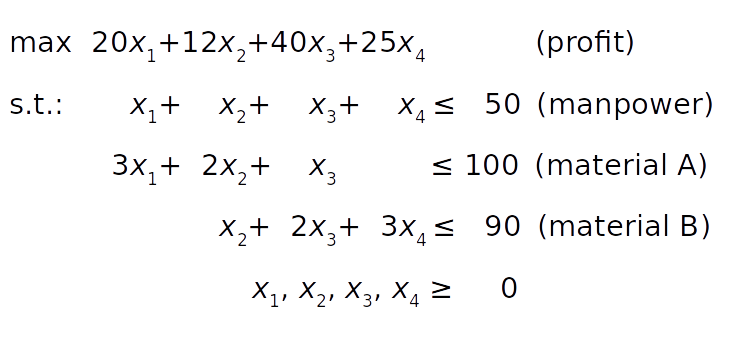

In [6]:
display(Image(filename='lp-py-eq-4.png'))

In [7]:
obj = [-20, -12, -40, -25]
lhs_ineq = [[1, 1, 1, 1],[3, 2, 1, 0],[0, 1, 2, 3]]
rhs_ineq = [ 50, 100, 90]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -1900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 40.,  0.])
  status: 0
 success: True
       x: array([ 5.,  0., 45.,  0.])

# Factory Problem 
The factory outputs twinkies, ho hos, cupcakes,  and snowballs

In [8]:
from pulp import *
problem = LpProblem("problemName", LpMaximize)

# factory cost per day
cost_twinkies = 1
cost_hohos = 2
cost_cupcakes = 3
cost_snowballs = .5

# factory throughput per day
produced_twinkies = 2e2
produced_hohos = 1e2
produced_cupcakes = 4e3
produced_snowballs = 5e5

# production goal
goal_twinkies = 1e3
goal_hohos = 5e2
goal_cupcakes = 1e4
goal_snowballs = 5e5

# time limit
max_num_days = 19

num_factories = 4
factory_days = LpVariable.dicts("factoryDays", list(range(num_factories)), 0, max_num_days, cat="Continuous")

# goal constraint
c1 = factory_days[0]*produced_twinkies >= goal_twinkies
c2= factory_days[1]*produced_hohos >= goal_hohos
c3= factory_days[2] * produced_cupcakes >= goal_cupcakes
c4= factory_days[3] * produced_snowballs >= goal_snowballs


# adding the constraints to the problem
problem += c1
problem += c2
problem += c3
problem += c4

# objective function
problem += -(factory_days[0]*cost_twinkies + factory_days[0]*cost_hohos +factory_days[0]*cost_cupcakes +factory_days[0]*cost_snowballs)
print(problem)
# solving
problem.solve()

# factory throughput per day
solution_twinkies= produced_twinkies * factory_days[0].varValue
solution_hohos=produced_hohos * factory_days[1].varValue
solution_cupcakes=produced_cupcakes * factory_days[2].varValue
solution_snowballs= produced_snowballs * factory_days[3].varValue
solution = [solution_twinkies,solution_hohos,solution_cupcakes,solution_snowballs]
items= ["twinkies","hohos","cupcakes","snowballs"]
for i in range(num_factories):

    print (f" {factory_days[i].varValue} days producing {round(solution[i],0)} {items[i]}")

problemName:
MAXIMIZE
-6.5*factoryDays_0 + -0.0
SUBJECT TO
_C1: 200 factoryDays_0 >= 1000

_C2: 100 factoryDays_1 >= 500

_C3: 4000 factoryDays_2 >= 10000

_C4: 500000 factoryDays_3 >= 500000

VARIABLES
factoryDays_0 <= 19 Continuous
factoryDays_1 <= 19 Continuous
factoryDays_2 <= 19 Continuous
factoryDays_3 <= 19 Continuous

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/skyeeiskowitz/.local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/7b3ccfe7898447aaa587acbc478e7be7-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/7b3ccfe7898447aaa587acbc478e7be7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 15 RHS
At line 20 BOUNDS
At line 25 ENDATA
Problem MODEL has 4 rows, 4 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-4) columns and 0 (-4) elements
Empty prob

In [18]:
from pulp import *
problem = LpProblem("problemName", LpMaximize)

# factory cost per day
cost_twinkies = 450
cost_hohos = 420
cost_cupcakes = 500
cost_snowballs = 520

# production goal
goal_twinkies = 450
goal_hohos = 420
goal_cupcakes = 500
goal_snowballs = 520


ModuleNotFoundError: No module named 'pulp'

In [49]:
from pulp import *
problem = LpProblem("problemName", LpMaximize)

# factory cost per day
cost_factory_0 = 450
cost_factory_1 = 420
cost_factory_2 = 400

# factory throughput per day
factory_0 = 2000
factory_1 = 1500
factory_2 = 1000

# production goal
production_goal = 80000

# time limit
max_num_days = 19

num_factories = 3
factory_days = LpVariable.dicts("factoryDays", list(range(num_factories)), 0, max_num_days, cat="Continuous")

# goal constraint
c1 = factory_days[0]*factory_0 + factory_days[1]*factory_1 + factory_days[2] * factory_2 >= production_goal

# additional production constraints
c2 = factory_days[0]*factory_0 <= 2*factory_days[1]*factory_1
c3 = factory_days[0]*factory_0 <= 2*factory_days[2]*factory_2
c4 = factory_days[1]*factory_1 <= 2*factory_days[2]*factory_2
c5 = factory_days[1]*factory_1 <= 2*factory_days[0]*factory_0
c6 = factory_days[2]*factory_2 <= 2*factory_days[1]*factory_1
c7 = factory_days[2]*factory_2 <= 2*factory_days[0]*factory_0

# adding the constraints to the problem
problem += c1
problem += c2
problem += c3
problem += c4
problem += c5
problem += c6
problem += c7

# objective function
problem += -factory_days[0]*cost_factory_0*factory_0 - factory_days[1]*cost_factory_1*factory_1 - factory_days[2]*cost_factory_2*factory_2
print(problem)
# solving
problem.solve()

for i in range(3):
    print(f"Factory {i}: {factory_days[i].varValue}")

problemName:
MAXIMIZE
-900000*factoryDays_0 + -630000*factoryDays_1 + -400000*factoryDays_2 + 0
SUBJECT TO
_C1: 2000 factoryDays_0 + 1500 factoryDays_1 + 1000 factoryDays_2 >= 80000

_C2: 2000 factoryDays_0 - 3000 factoryDays_1 <= 0

_C3: 2000 factoryDays_0 - 2000 factoryDays_2 <= 0

_C4: 1500 factoryDays_1 - 2000 factoryDays_2 <= 0

_C5: - 4000 factoryDays_0 + 1500 factoryDays_1 <= 0

_C6: - 3000 factoryDays_1 + 1000 factoryDays_2 <= 0

_C7: - 4000 factoryDays_0 + 1000 factoryDays_2 <= 0

VARIABLES
factoryDays_0 <= 19 Continuous
factoryDays_1 <= 19 Continuous
factoryDays_2 <= 19 Continuous

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ahillman89/.local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/6c244a701a2d4263870e16baa5cad9f6-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/6c244a701a2d4263870e16baa5cad9f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At